In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**<h1>Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [ ]:
df.rename(columns = {"v1": "Target", "v2": "Text"}, inplace = True)

In [ ]:
# Change target column using labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Target"] = encoder.fit_transform(df["Target"])

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Check missing values
df.isnull().sum()

,0
Target,0
Text,0


In [ ]:
#Check duplicates
df.duplicated().sum()

np.int64(403)

In [ ]:
#Drop duplicates
df = df.drop_duplicates(keep = "first")

In [ ]:
df.shape

(5169, 2)

**<h1>EDA**

In [ ]:
df["Target"].value_counts()

,count
Target,
0,4516
1,653


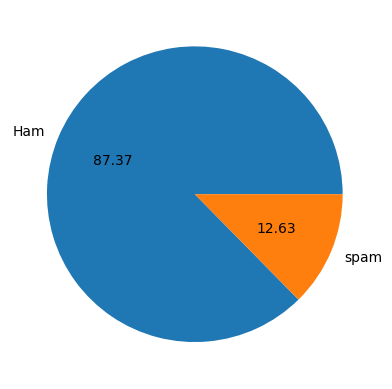

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(), labels = ["Ham", "spam"], autopct = "%0.2f")
plt.show()

In [ ]:
# Data is imbalanced as ham: 87% and rest are spam

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df["num_characters"] = df["Text"].apply(len)

In [ ]:
# Count number of words
nltk.download('punkt_tab')
df["num_words"] = df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Count number of sentences
df["num_sentences"] = df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
df[df["Target"] == 0].describe()
df[df["Target"] == 1].describe()

,Target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

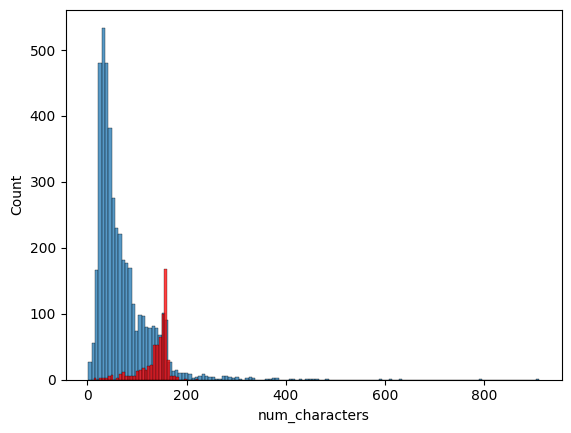

In [ ]:
import seaborn as sns
sns.histplot(df[df["Target"] == 0]["num_characters"])
sns.histplot(df[df["Target"] == 1]["num_characters"], color = "red")

<Axes: >

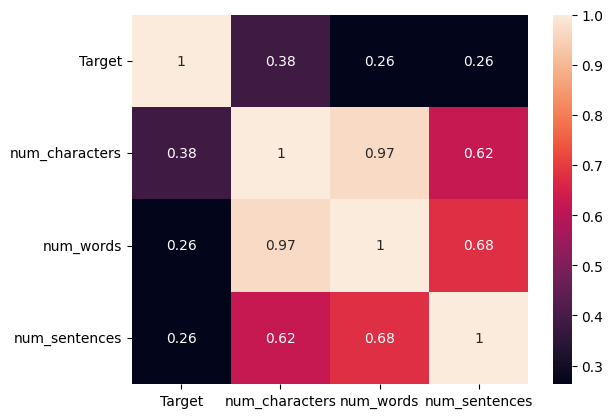

In [ ]:
sns.heatmap(df.drop(columns = "Text").corr(), annot = True)

**<h1>TExt Preprocessing**

In [ ]:
def text_preprocess(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  L = []
  for i in text:
    if i.isalnum():
      L.append(i)

  text = L[:]
  L.clear()
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      L.append(i)

  text = L[:]
  L.clear()

  for i in text:
    L.append(ps.stem(i))
  return " ".join(L)

In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
df["Transform_text"] = df["Text"].apply(text_preprocess)

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
df.shape

(5169, 6)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 8, background_color = "white")

In [ ]:
spam = wc.generate(df[df["Target"] == 1]["Transform_text"].str.cat(sep = " "))

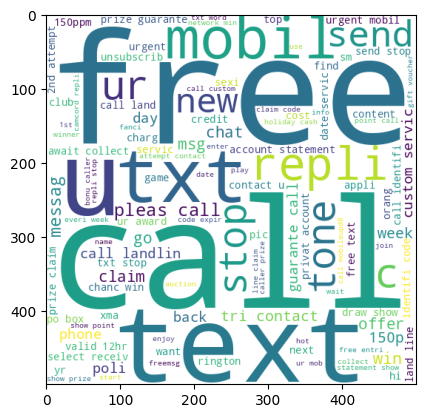

In [ ]:
plt.imshow(spam)

In [ ]:
ham = wc.generate(df[df["Target"] == 0]["Transform_text"].str.cat(sep = " "))

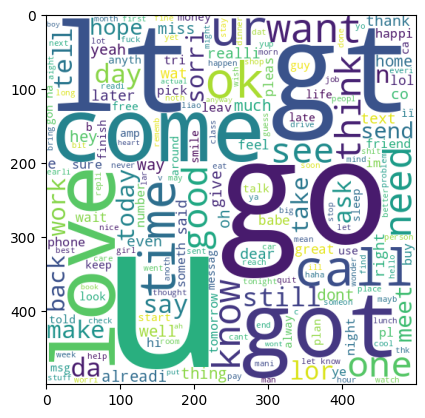

In [ ]:
plt.imshow(ham)

In [ ]:
# count top 25 words in spam message
spam_msg = []
for msg in df[df["Target"] == 1]["Transform_text"].tolist():
  for word in msg.split():
    spam_msg.append(word)


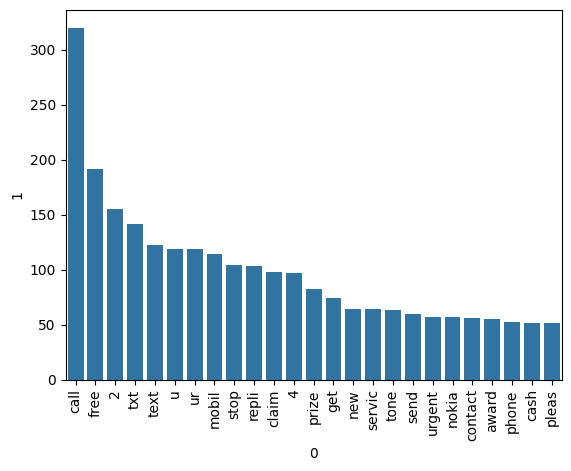

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_msg).most_common(25))[0], y=pd.DataFrame(Counter(spam_msg).most_common(25))[1])
plt.xticks(rotation='vertical')
plt.show()

**<h1>Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
x = tfidf.fit_transform(df["Transform_text"]).toarray()

In [ ]:
#append num_character column in x
#x = np.hstack((x, df["num_characters"].values.reshape(-1,1)))

In [ ]:
y = df["Target"].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y , test_size = 0.2, random_state = 2)

In [ ]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [ ]:
GNB.fit(x_train, y_train)
y_pred1 = GNB.predict(x_test)
acc = accuracy_score(y_test, y_pred1)
con = confusion_matrix(y_test, y_pred1)
pre = precision_score(y_test, y_pred1)
print(f"accuracy score is {acc}")
print(f"confusion matrix is {con}")
print(f"precision score is {pre}")

accuracy score is 0.874274661508704
confusion matrix is [[790 106]
 [ 24 114]]
precision score is 0.5181818181818182


In [ ]:
MNB.fit(x_train, y_train)
y_pred1 = MNB.predict(x_test)
acc = accuracy_score(y_test, y_pred1)
con = confusion_matrix(y_test, y_pred1)
pre = precision_score(y_test, y_pred1)
print(f"accuracy score is {acc}")
print(f"confusion matrix is {con}")
print(f"precision score is {pre}")

accuracy score is 0.9709864603481625
confusion matrix is [[896   0]
 [ 30 108]]
precision score is 1.0


In [ ]:
BNB.fit(x_train, y_train)
y_pred1 = BNB.predict(x_test)
acc = accuracy_score(y_test, y_pred1)
con = confusion_matrix(y_test, y_pred1)
pre = precision_score(y_test, y_pred1)
print(f"accuracy score is {acc}")
print(f"confusion matrix is {con}")
print(f"precision score is {pre}")

accuracy score is 0.9835589941972921
confusion matrix is [[895   1]
 [ 16 122]]
precision score is 0.991869918699187


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators= 50, random_state = 40)
knn = KNeighborsClassifier()
svc = SVC(kernel = "sigmoid")

In [ ]:
def model_building(model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  pre = precision_score(y_test, y_pred)
  print(f"accuracy score is {acc}")
  print(f"precision score is {pre}")

In [ ]:
model_building(lr)

accuracy score is 0.9545454545454546
precision score is 0.9789473684210527


In [ ]:
model_building(rf)

accuracy score is 0.97678916827853
precision score is 0.9830508474576272


In [ ]:
model_building(knn)

accuracy score is 0.9052224371373307
precision score is 1.0


In [ ]:
model_building(svc)

accuracy score is 0.9758220502901354
precision score is 0.9747899159663865


In [ ]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(MNB, open("model.pkl", "wb"))